In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.model_selection import learning_curve
# set up notebook to show all outputs in a cell, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np
import os

In [5]:
df = pd.read_csv("cleaned_data (5).csv")
df.fillna({"Native Hawaiian and Other Pacific Islander": 0,"White":0}, inplace=True)
df.head()

,Year,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,White
0,1990,2987764.0,1024198.0,16224.0,21869.0,0.0,2987764.0
1,1991,3018779.0,1040280.0,17015.0,23082.0,0.0,3018779.0
2,1992,3051680.0,1060627.0,17357.0,24350.0,0.0,3051680.0
3,1993,3088449.0,1081479.0,18002.0,26272.0,0.0,3088449.0
4,1994,3114389.0,1099593.0,18566.0,27681.0,0.0,3114389.0


In [6]:
white_vals = df["White"].values
black_vals = df["Black or African American"].values
AIAN_vals = df["American Indian and Alaska Native"].values
asian_vals = df["Asian"].values
PI_values = df["Native Hawaiian and Other Pacific Islander"].values

In [7]:
X = df["Year"].values
X = X.reshape(len(X),1)
regressions = {}
data = df.iloc[:,1:].iloc[:,:-1]
for column,series in data.items():
    print(column)
    y = series.values
    y= y.reshape(len(y),1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    regr = LinearRegression()
    regr.fit(X_train,y_train)
    r_squared=regr.score(X_test,y_test)
    regressions[column] = {
       "X_train":X_train,
       "X_test":X_test,
       "y_train":y_train,
       "y_test":y_test,
       "regr":regr,
       "r_squared":r_squared,
    }

White


LinearRegression()

Black or African American


LinearRegression()

American Indian and Alaska Native


LinearRegression()

Asian


LinearRegression()

Native Hawaiian and Other Pacific Islander


LinearRegression()

Text(0.5, 1.0, 'White')

[Text(0.5, 0, 'year'), Text(0, 0.5, 'population (thousands)')]

Text(0.5, 1.0, 'Black or African American')

[Text(0.5, 0, 'year'), Text(0, 0.5, 'population (thousands)')]

Text(0.5, 1.0, 'American Indian and Alaska Native')

[Text(0.5, 0, 'year'), Text(0, 0.5, 'population (thousands)')]

Text(0.5, 1.0, 'Asian')

[Text(0.5, 0, 'year'), Text(0, 0.5, 'population (thousands)')]

Text(0.5, 1.0, 'Native Hawaiian and Other Pacific Islander')

[Text(0.5, 0, 'year'), Text(0, 0.5, 'population (thousands)')]

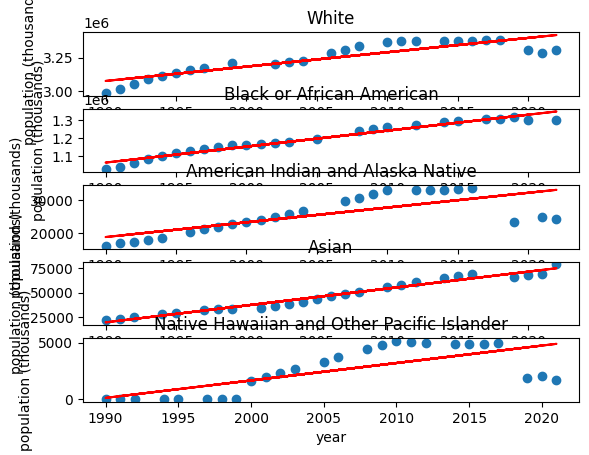

In [11]:
fig,axs=plt.subplots(5)
for ax,(race,regr) in zip(axs,regressions.items()):
    ax.set_title(race)
    ax.set(xlabel="year",ylabel="population (thousands)")
    ax.scatter(regr["X_train"],regr["y_train"])
    ax.plot(regr["X_train"],regr["regr"].predict(regr["X_train"]),color="red")

In [ ]:
# from datasets import load_dataset

# # Load a dataset (e.g., IMDB for this example)
# dataset = load_dataset("imdb")

# # Keep only the 'text' and 'label' columns
# subset_dataset = dataset['train'].remove_columns([col for col in dataset['train'].column_names if col not in ['text', 'label']])

# print(subset_dataset.column_names)

In [ ]:
def create_dataset(X, window_size):
    num_samples = (X.shape[0] - window_size)
    X_featurized, y = [], []

    for i in range(num_samples):
        X_featurized.append(X[i:i+window_size])
        y.append(X[i+1:i+window_size+1])

    return np.stack(X_featurized).squeeze(), np.stack(y).squeeze()

In [ ]:
# for I in range(0, len(df_selected), 30):
#     state_pop = df_selected.iloc[I, I+30]
#     States = []
#     for I in range(0, len(df_selected), 30):
#         states.append(df_selected.iloc[I, I+30])
#         states.append((“name of state”, df_selected))

In [14]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

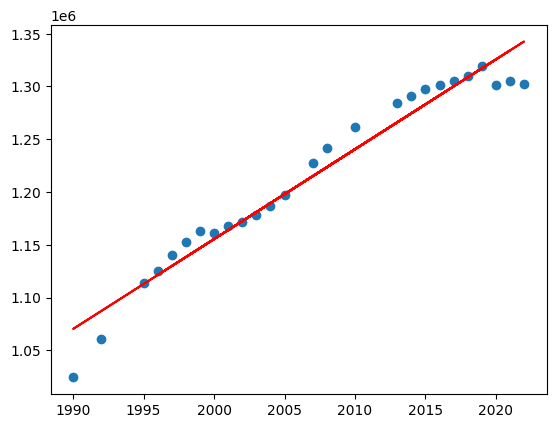

In [15]:
# plt.scatter(x_train,y_train)
# plt.plot(x_train,regr.predict(x_train),color="red")

In [16]:
print(regr.coef_,regr.intercept_)
"y={coef:.2f}x{intercept:.2f}".format(coef = regr.coef_[0][0],intercept = regr.intercept_[0])

[[8514.02714165]] [-15872695.08866706]


'y=8514.03x-15872695.09'

0.9515192810426287